# Tâche 9

In [1]:
#Imports utiles

from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon.plotter import *
#from pymatgen.electronic_structure import plotter

In [2]:
#On récupère la structure de bandes

with MPRester("8M635zkNlb27ZqrS") as mp:
    phonon_band = mp.get_phonon_bandstructure_by_material_id("mp-581024")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Plot de la structure de bandes de phonons

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

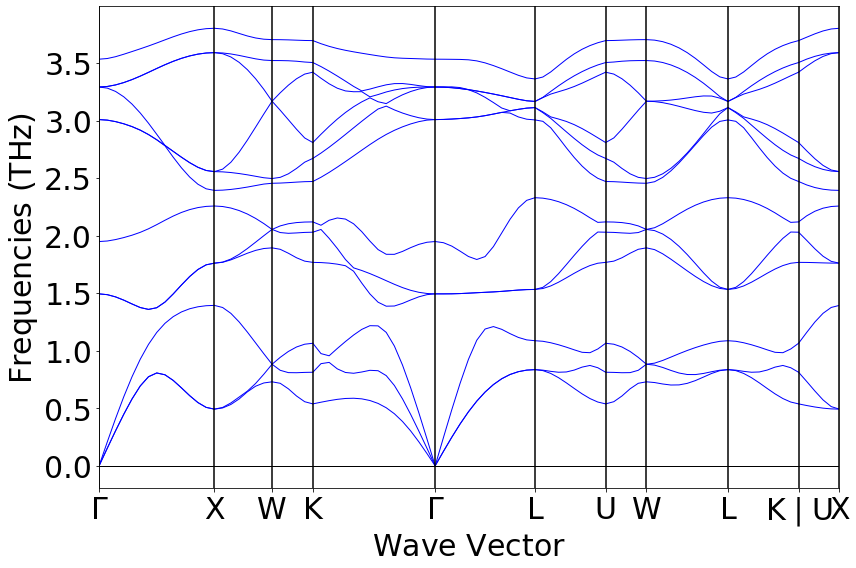

In [3]:
#On commence par plotter la structure de bandes

plot = PhononBSPlotter(phonon_band)
plot.get_plot()


###### On remarque que les fréquences sur l'axe vertical sont en THz donc $10^{12}$Hz, cela devra être pris en compte pour calculer les vitesses du son

## On récupère des données qui seront nécessaires au calcul des vitesses

In [4]:
bs_plot_data_phonon = plot.bs_plot_data()
frequency_phonon = bs_plot_data_phonon.get('frequency')
distance = bs_plot_data_phonon.get('distances')#Abcisses des différents chemins de la zone de Brillouin (sur le graphe)

## Traçage des 3 branches acoustiques (sur le graphe ci-dessus) qui vont être analysées

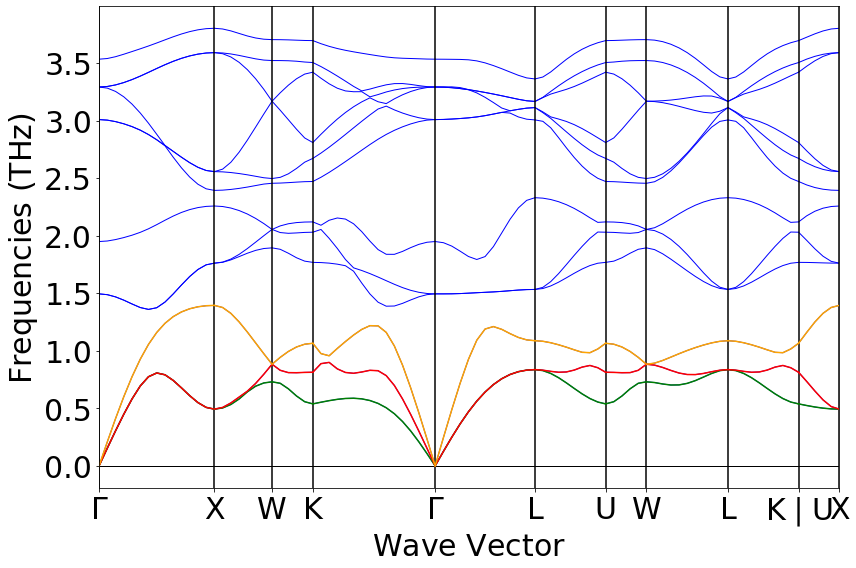

In [5]:
plot.get_plot()
for i in range(len(distance)): # On plot pour chaque chemin de la zone de Brillouin
    plt.plot(distance[i],frequency_phonon[i][0],'green')  #On trace la première branche acoustique
    plt.plot(distance[i],frequency_phonon[i][1],'red')    #On trace la deuxième branche acoustique
    plt.plot(distance[i],frequency_phonon[i][2],'orange') #On trace la troisième branche acoustique

#### La première branche acoustique est tracée en vert, la seconde en rouge et la troisième en orange.

## Théorie pour calculer la vitesse du son

Les branches acoustiques de la structure de bandes de phonons ont tous un caractère linéaire proche du point $\Gamma$, l'origine de la permière zone de Brillouin. La pente de ces relations linéaires proche de $\Gamma$ représentent la vitesse du son pour la branche correspondante dans la direction correspondante au chemin. La relation linéaire est alors $\omega = v_s q$ (avec $v_s$ la vitesse du son) qui est donc une très bonne apparoximation de l'allure linéaire de la courbe. On peut alors calculer $v_s$ comme $\frac{\Delta \omega}{\Delta q}$ en prenant $\Delta \omega$ et $\Delta q$ des différences entre une valeur proche du point $\Gamma$ et $\Gamma$. Il faut faire attention aux changements d'unités! Les fréquences de frequency_phonon sont données en THz ($10^{12}$ Hz) mais on veut une vitesse angulaire (pour $\omega$), on doit donc multiplier ces fréquences par 2$\pi$. Les vecteurs d'onde sont exprimés en $\frac{1}{Å} = \frac{1}{10^{-10} m}$. Il faut donc diviser q par $10^{-10}$ pour retomber sur les bonnes unités (qui sont des m/s).

On remarque qu'en partant de $\Gamma$, on peut distinguer 3 chemins différents en partant de $\Gamma$ : $\Gamma$-L, $\Gamma$-K et $\Gamma$-X. On va donc calculer les vitesses du son pour les 3 branches acoustiques dans ces 3 directions.

### Calcul pour la première branche acoustique (en vert sur le graphe)

La vitesse du son pour la première branche acoustique (en vert) pour le chemin Γ-X vaut :  1817.6383264006752 m/s.
La vitesse du son pour la première branche acoustique (en vert) pour le chemin Γ-K vaut :  1260.0663331212372 m/s.
La vitesse du son pour la première branche acoustique (en vert) pour le chemin Γ-L vaut :  1470.4395672349574 m/s.


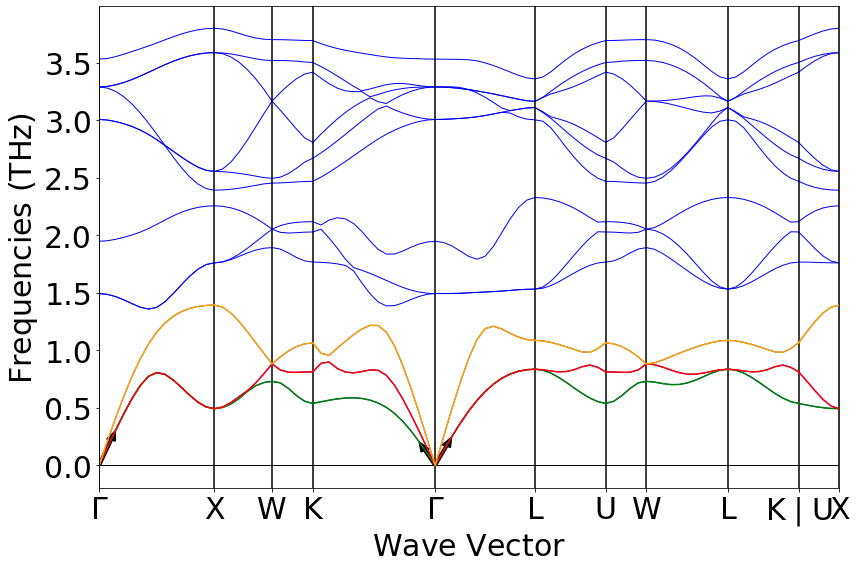

In [6]:
#On replot le graphe
plot.get_plot()
for i in range(len(distance)): 
    plt.plot(distance[i],frequency_phonon[i][0],'green') 
    plt.plot(distance[i],frequency_phonon[i][1],'red')   
    plt.plot(distance[i],frequency_phonon[i][2],'orange')

#Calcul pour le chemin gamma-X
gamma_x_first = distance[0] #les q du chemin gamma-X
freq__first_x = frequency_phonon[0][0] #Les fréquences de la première branche pour le chemin gamma-X
delta_q_x_first = gamma_x_first[2] - gamma_x_first[0] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_x_first = (freq__first_x[2] - freq__first_x[0]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_x_first = ((delta_w_x_first)*10**12/10**(10)*(2*np.pi))/(delta_q_x_first) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_x_first[0], freq__first_x[0], delta_q_x_first, delta_w_x_first, color='black',width = 0.02,length_includes_head =True)

#Calcul pour le chemin gamma-K
gamma_k_first = distance[3] #les q du chemin gamma-K
freq__first_k = frequency_phonon[3][0] #Les fréquences de la première branche pour le chemin gamma-K
delta_q_k_first = gamma_k_first[-3] - gamma_k_first[-1] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_k_first = (freq__first_k[-3] - freq__first_k[-1]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_k_first = abs(((delta_w_k_first)*10**12/10**(10)*(2*np.pi))/(delta_q_k_first)) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_k_first[-1], freq__first_k[-1], delta_q_k_first, delta_w_k_first, color='black',width = 0.02,length_includes_head =True)

#Calcul pour le chemin gamma-L
gamma_l_first = distance[4] #les q du chemin gamma-L
freq__first_l = frequency_phonon[4][0] #Les fréquences de la première branche pour le chemin gamma-L
delta_q_l_first = gamma_l_first[2] - gamma_l_first[0] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_l_first = (freq__first_l[2] - freq__first_l[0]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_l_first = ((delta_w_l_first)*10**12/10**(10)*(2*np.pi))/(delta_q_l_first) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_l_first[0], freq__first_l[0], delta_q_l_first, delta_w_l_first, color='black',width = 0.02,length_includes_head =True)

print("La vitesse du son pour la première branche acoustique (en vert) pour le chemin Γ-X vaut : ", vs_gamma_x_first, "m/s.")
print("La vitesse du son pour la première branche acoustique (en vert) pour le chemin Γ-K vaut : ", vs_gamma_k_first, "m/s.")
print("La vitesse du son pour la première branche acoustique (en vert) pour le chemin Γ-L vaut : ", vs_gamma_l_first, "m/s.")


### Calcul pour la deuxième branche acoustique (en rouge sur le graphe)

La vitesse du son pour la deuxième branche acoustique (en rouge) pour le chemin Γ-X vaut :  1817.638326400688 m/s.
La vitesse du son pour la deuxième branche acoustique (en rouge) pour le chemin Γ-K vaut :  1822.8616295459992 m/s.
La vitesse du son pour la deuxième branche acoustique (en rouge) pour le chemin Γ-L vaut :  1470.4395672350822 m/s.


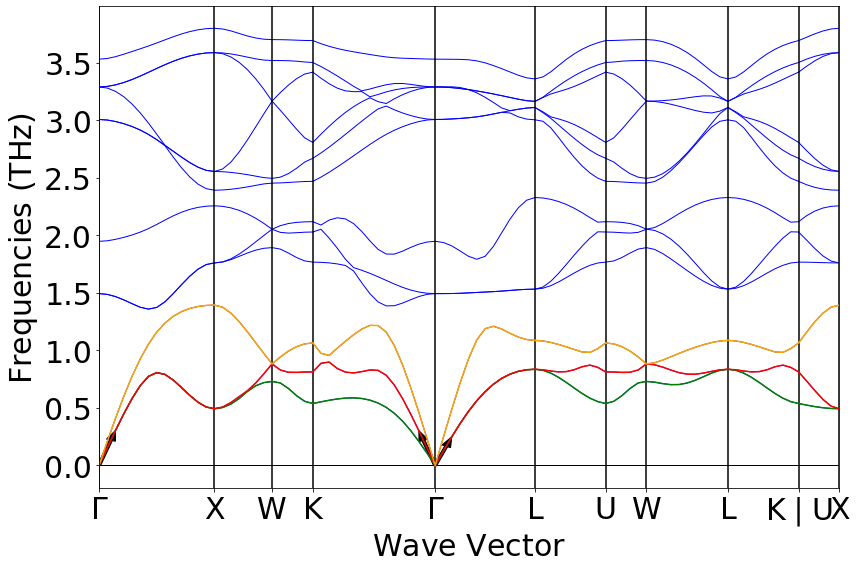

In [7]:
#On replot le graphe
plot.get_plot()
for i in range(len(distance)): 
    plt.plot(distance[i],frequency_phonon[i][0],'green') 
    plt.plot(distance[i],frequency_phonon[i][1],'red')   
    plt.plot(distance[i],frequency_phonon[i][2],'orange')

#Calcul pour le chemin gamma-X
gamma_x_second = distance[0] #les q du chemin gamma-X
freq__second_x = frequency_phonon[0][1] #Les fréquences de la deuxième branche pour le chemin gamma-X
delta_q_x_second = gamma_x_second[2] - gamma_x_second[0] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_x_second = (freq__second_x[2] - freq__second_x[0]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_x_second = ((delta_w_x_second)*10**12/10**(10)*(2*np.pi))/(delta_q_x_second) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_x_second[0], freq__second_x[0], delta_q_x_second, delta_w_x_second, color='black',width = 0.02,length_includes_head =True)

#Calcul pour le chemin gamma-K
gamma_k_second = distance[3] #les q du chemin gamma-K
freq__second_k = frequency_phonon[3][1] #Les fréquences de la deuxième branche pour le chemin gamma-K
delta_q_k_second = gamma_k_second[-3] - gamma_k_second[-1] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_k_second = (freq__second_k[-3] - freq__second_k[-1]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_k_second = abs(((delta_w_k_second)*10**12/10**(10)*(2*np.pi))/(delta_q_k_second)) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_k_second[-1], freq__second_k[-1], delta_q_k_second, delta_w_k_second, color='black',width = 0.02,length_includes_head =True)

#Calcul pour le chemin gamma-L
gamma_l_second = distance[4] #les q du chemin gamma-L
freq__second_l = frequency_phonon[4][1] #Les fréquences de la deuxième branche pour le chemin gamma-L
delta_q_l_second = gamma_l_second[2] - gamma_l_second[0] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_l_second = (freq__second_l[2] - freq__second_l[0]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_l_second = ((delta_w_l_second)*10**12/10**(10)*(2*np.pi))/(delta_q_l_second) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_l_second[0], freq__second_l[0], delta_q_l_second, delta_w_l_second, color='black',width = 0.02,length_includes_head =True)

print("La vitesse du son pour la deuxième branche acoustique (en rouge) pour le chemin Γ-X vaut : ", vs_gamma_x_second, "m/s.")
print("La vitesse du son pour la deuxième branche acoustique (en rouge) pour le chemin Γ-K vaut : ", vs_gamma_k_second, "m/s.")
print("La vitesse du son pour la deuxième branche acoustique (en rouge) pour le chemin Γ-L vaut : ", vs_gamma_l_second, "m/s.")

### Calcul pour la deuxième branche acoustique (en orange sur le graphe)

La vitesse du son pour la troisième branche acoustique (en orange) pour le chemin Γ-X vaut :  2453.1099125330807 m/s.
La vitesse du son pour la troisième branche acoustique (en orange) pour le chemin Γ-K vaut :  2783.4293193458093 m/s.
La vitesse du son pour la troisième branche acoustique (en orange) pour le chemin Γ-L vaut :  2885.7537080628717 m/s.


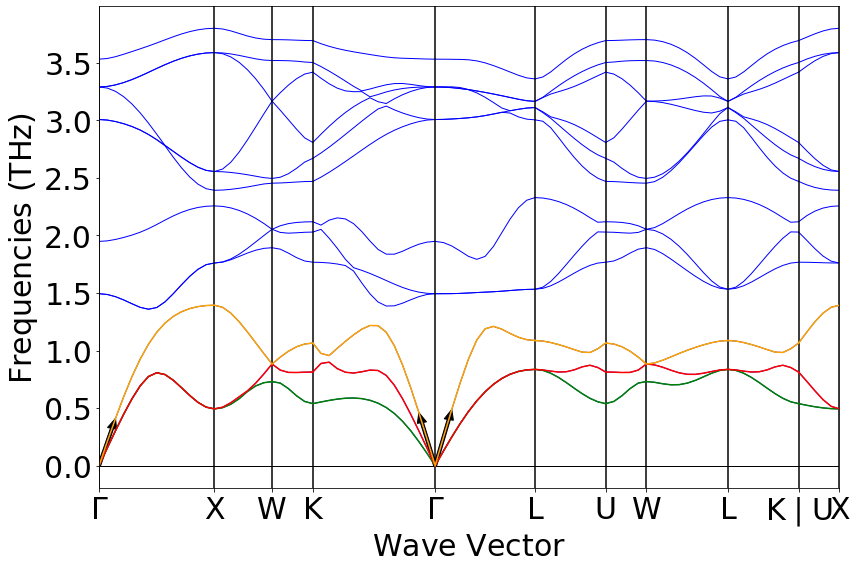

In [8]:
#On replot le graphe
plot.get_plot()
for i in range(len(distance)): 
    plt.plot(distance[i],frequency_phonon[i][0],'green') 
    plt.plot(distance[i],frequency_phonon[i][1],'red')   
    plt.plot(distance[i],frequency_phonon[i][2],'orange')

#Calcul pour le chemin gamma-X
gamma_x_third = distance[0] #les q du chemin gamma-X
freq__third_x = frequency_phonon[0][2] #Les fréquences de la troisième branche pour le chemin gamma-X
delta_q_x_third = gamma_x_third[2] - gamma_x_third[0] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_x_third = (freq__third_x[2] - freq__third_x[0]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_x_third = ((delta_w_x_third)*10**12/10**(10)*(2*np.pi))/(delta_q_x_third) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_x_third[0], freq__third_x[0], delta_q_x_third, delta_w_x_third, color='black',width = 0.02,length_includes_head =True)

#Calcul pour le chemin gamma-K
gamma_k_third = distance[3] #les q du chemin gamma-K
freq__third_k = frequency_phonon[3][2] #Les fréquences de la troisième branche pour le chemin gamma-K
delta_q_k_third = gamma_k_third[-3] - gamma_k_third[-1] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_k_third = (freq__third_k[-3] - freq__third_k[-1]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_k_third = abs(((delta_w_k_third)*10**12/10**(10)*(2*np.pi))/(delta_q_k_third)) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_k_third[-1], freq__third_k[-1], delta_q_k_third, delta_w_k_third, color='black',width = 0.02,length_includes_head =True)

#Calcul pour le chemin gamma-L
gamma_l_third = distance[4] #les q du chemin gamma-L
freq__third_l = frequency_phonon[4][2] #Les fréquences de la troisième branche pour le chemin gamma-L
delta_q_l_third = gamma_l_third[2] - gamma_l_third[0] # Le delta_q (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
delta_w_l_third = (freq__third_l[2] - freq__third_l[0]) #Le delta_w (on prend la troisième valeur (indice2) pour obtenir la pente proche de l'origine)
vs_gamma_l_third = ((delta_w_l_third)*10**12/10**(10)*(2*np.pi))/(delta_q_l_third) #On calcule le vs (avec la conversion d'unités)
#On trace une flèche représentant la pente sur le graphe
plt.arrow(gamma_l_third[0], freq__third_l[0], delta_q_l_third, delta_w_l_third, color='black',width = 0.02,length_includes_head =True)

print("La vitesse du son pour la troisième branche acoustique (en orange) pour le chemin Γ-X vaut : ", vs_gamma_x_third, "m/s.")
print("La vitesse du son pour la troisième branche acoustique (en orange) pour le chemin Γ-K vaut : ", vs_gamma_k_third, "m/s.")
print("La vitesse du son pour la troisième branche acoustique (en orange) pour le chemin Γ-L vaut : ", vs_gamma_l_third, "m/s.")

##### On remarque pour le chemin $\Gamma$-X, les branches une  (en vert) et deux (en rouge) sont confondues, ce qui donne la même vitesse du son pour ces deux branches. Le même phénomène se produit pour les mêmes branches mais pour le chemin $\Gamma$-L.

#### On remarque aussi que nous obtenons des valeurs classiques de vitesse du son dans un cristal.